In [49]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
tf.random.set_seed(42)

import time

# change working directory to where the data is
import os
os.chdir("/Users/moonbee/Cyto/Human_T_Cell_Profile/")

In [50]:
# read csv table with rows and columns
df = pd.read_csv("LN_labeled_data.csv", index_col=0, header=0)
df.head()

,FSC-A,SSC-A,CD14,CD103,HLADR,CD20,CD8,CD4,CD3,CD45RA,CCR7,Population
0,262143.000,170898.53,1054.50,1688.580000,24736.14,30471.8180,1490.34000,6727.82000,1545.47990,55426.336,3071.97,CD20+ B cells
1,141144.950,68960.88,363.66,926.300000,15552.90,12555.6990,742.22000,4297.23970,704.89996,25495.120,1150.38,CD20+ B cells
2,104009.836,42376.08,12.54,923.939940,1407.78,133.5600,1564.67990,4456.23970,8291.31900,12832.359,11447.37,CD4+ T cells
3,100292.720,47255.28,126.54,-61.359997,5387.58,4061.9197,488.52000,708.07996,246.97998,9153.100,277.20,CD20+ B cells
4,107753.360,37875.36,198.36,377.599980,4177.80,3977.1199,292.63998,1387.53990,164.29999,9253.800,739.53,CD20+ B cells


In [51]:
# split the data into X and y
X = df.drop('Population', axis=1)
y = df['Population']

In [52]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Logistic regression

# start the timer
start_time_LR = time.time()

# create a pipeline with data standardization and logistic regression
pipeline_LR = Pipeline([
    ('scaler', MinMaxScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# define the hyperparameters to be optimized
param_grid_LR = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']
}

# create a GridSearchCV object
grid_search_LR = GridSearchCV(pipeline_LR, param_grid_LR, cv=5, scoring='accuracy', n_jobs=-1)

# fit the model
grid_search_LR.fit(X_train, y_train)

# keep best parameters
best_params = grid_search_LR.best_params_

# make prediction on the test set
y_pred = grid_search_LR.predict(X_test)

# generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# convert the report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# add the column with the cell types
df_report.reset_index(inplace=True)
df_report.rename(columns={'index': 'Cell Type'}, inplace=True)

# stop the timer
end_time_LR = time.time()

# calculate the execution time
duration_LR = end_time_LR - start_time_LR

# print the execution time
print(f"Execution time: {int(duration_LR // 60)} minutes and {int(duration_LR % 60)} seconds" if duration_LR >= 60 else f"Execution time: {int(duration_LR)} seconds\n")

# print best hyperparameters
print("Best parameters: {}".format(best_params) + "\n")

# print classification report
print(df_report.to_string(index=False))

Execution time: 23 seconds

Best parameters: {'logreg__C': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}

      Cell Type  precision   recall  f1-score      support
CD14+ Monocytes   0.975754 0.977862  0.976807  1852.000000
  CD20+ B cells   0.996255 0.996362  0.996308  9345.000000
   CD4+ T cells   0.996702 0.996264  0.996483  9101.000000
   CD8+ T cells   0.995605 0.987888  0.991732  2064.000000
    Other cells   0.963790 0.972594  0.968172  1642.000000
       accuracy   0.992543 0.992543  0.992543     0.992543
      macro avg   0.985621 0.986194  0.985900 24004.000000
   weighted avg   0.992566 0.992543  0.992552 24004.000000


In [54]:
# K-Nearest Neighbor

# start the timer
start_time_kNN = time.time()

# create a pipeline with data standardization and KNN
pipeline_kNN = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

# define the hyperparameters to be optimized
param_grid_kNN = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# create a GridSearchCV object
grid_search_kNN = GridSearchCV(pipeline_kNN, param_grid_kNN, cv=5, scoring='accuracy', n_jobs=-1)

# fit the model
grid_search_kNN.fit(X_train, y_train)

# keep best parameters
best_params = grid_search_kNN.best_params_

# make prediction on the test set
y_pred = grid_search_kNN.predict(X_test)

# generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# convert the report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# add the column with the cell types
df_report.reset_index(inplace=True)
df_report.rename(columns={'index': 'Cell Type'}, inplace=True)

# stop the timer
end_time_kNN = time.time()

# calculate the execution time
duration_kNN = end_time_kNN - start_time_kNN

# print the execution time
print(f"Execution time: {int(duration_kNN // 60)} minutes and {int(duration_kNN % 60)} seconds" if duration_kNN >= 60 else f"Execution time: {int(duration_kNN)} seconds\n")

# print best hyperparameters
print("Best parameters: {}".format(best_params) + "\n")

# print classification report
print(df_report.to_string(index=False))

Execution time: 39 seconds

Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}

      Cell Type  precision   recall  f1-score      support
CD14+ Monocytes   0.974290 0.982181  0.978220  1852.000000
  CD20+ B cells   0.995388 0.993151  0.994269  9345.000000
   CD4+ T cells   0.993519 0.993847  0.993683  9101.000000
   CD8+ T cells   0.997521 0.974806  0.986033  2064.000000
    Other cells   0.939716 0.968331  0.953809  1642.000000
       accuracy   0.989293 0.989293  0.989293     0.989293
      macro avg   0.980087 0.982463  0.981203 24004.000000
   weighted avg   0.989427 0.989293  0.989333 24004.000000


In [55]:
# Naive Bayes

# start the timer
start_time_NB = time.time()

# create a pipeline with data standardization and Naive Bayes
pipeline_NB = Pipeline([
    ('scaler', MinMaxScaler()),
    ('nb', GaussianNB())
])

# define the hyperparameters to be optimized
param_grid_NB = {
    'nb__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]
}

# create a GridSearchCV object
grid_search_NB = GridSearchCV(pipeline_NB, param_grid_NB, cv=5, scoring='accuracy', n_jobs=-1)

# fit the model
grid_search_NB.fit(X_train, y_train)

# keep best parameters
best_params = grid_search_NB.best_params_

# make prediction on the test set
y_pred = grid_search_NB.predict(X_test)

# generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# convert the report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# add the column with the cell types
df_report.reset_index(inplace=True)

# stop the timer
end_time_NB = time.time()

# calculate the execution time
duration_NB = end_time_NB - start_time_NB

# print the execution time
print(f"Execution time: {int(duration_NB // 60)} minutes and {int(duration_NB % 60)} seconds" if duration_NB >= 60 else f"Execution time: {int(duration_NB)} seconds\n")

# print best hyperparameters
print("Best parameters: {}".format(best_params) + "\n")

# print classification report
print(df_report.to_string(index=False))

Execution time: 1 seconds

Best parameters: {'nb__var_smoothing': 1e-06}

          index  precision   recall  f1-score      support
CD14+ Monocytes   0.860710 0.837473  0.848933  1852.000000
  CD20+ B cells   0.968018 0.981380  0.974653  9345.000000
   CD4+ T cells   0.996448 0.986375  0.991386  9101.000000
   CD8+ T cells   0.975214 0.991279  0.983181  2064.000000
    Other cells   0.911166 0.899513  0.905302  1642.000000
       accuracy   0.967422 0.967422  0.967422     0.967422
      macro avg   0.942311 0.939204  0.940691 24004.000000
   weighted avg   0.967248 0.967422  0.967287 24004.000000


In [56]:
# Random Forest

# start the timer
start_time_RF = time.time()

# create a pipeline with data standardization and Random Forest
pipeline_RF = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rf', RandomForestClassifier())
])

# define the hyperparameters to be optimized
param_grid_RF = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_features': ['sqrt', 'log2'],
    'rf__max_depth': [None, 5, 10, 20]
}

# create a GridSearchCV object
grid_search_RF = GridSearchCV(pipeline_RF, param_grid_RF, cv=5, scoring='accuracy', n_jobs=-1)

# fit the model
grid_search_RF.fit(X_train, y_train)

# keep best parameters
best_params = grid_search_RF.best_params_

# make prediction on the test set
y_pred = grid_search_RF.predict(X_test)

# generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# convert the report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# add the column with the cell types
df_report.reset_index(inplace=True)
df_report.rename(columns={'index': 'Cell Type'}, inplace=True)

# stop the timer
end_time_RF = time.time()

# calculate the execution time
duration_RF = end_time_RF - start_time_RF

# print the execution time
print(f"Execution time: {int(duration_RF // 60)} minutes and {int(duration_RF % 60)} seconds" if duration_RF >= 60 else f"Execution time: {int(duration_RF)} seconds\n")

# print best hyperparameters
print("Best parameters: {}".format(best_params) + "\n")

# print classification report
print(df_report.to_string(index=False))

Execution time: 12 minutes and 12 seconds
Best parameters: {'rf__max_depth': 20, 'rf__max_features': 'log2', 'rf__n_estimators': 300}

      Cell Type  precision   recall  f1-score      support
CD14+ Monocytes   0.986985 0.982721  0.984848  1852.000000
  CD20+ B cells   0.997328 0.998395  0.997861  9345.000000
   CD4+ T cells   0.998242 0.998132  0.998187  9101.000000
   CD8+ T cells   0.996604 0.995155  0.995879  2064.000000
    Other cells   0.982360 0.983557  0.982958  1642.000000
       accuracy   0.995792 0.995792  0.995792     0.995792
      macro avg   0.992304 0.991592  0.991947 24004.000000
   weighted avg   0.995790 0.995792  0.995791 24004.000000


8 nodes, dropout 0, lr 0.01, batch size 32


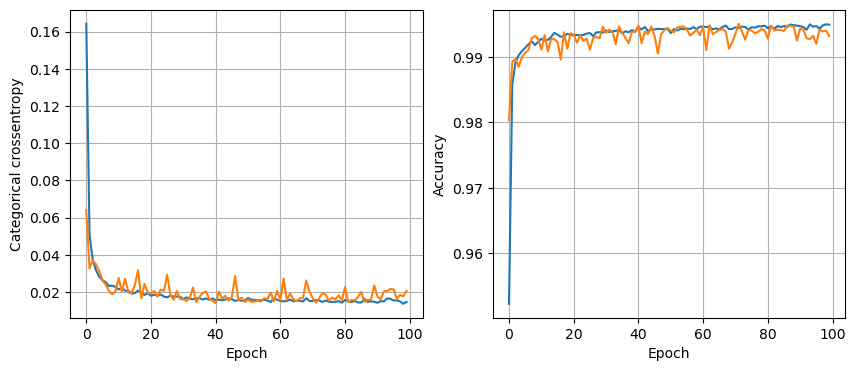

751/751 [==============================] - 0s 382us/step - loss: 0.0205 - accuracy: 0.9935
8 nodes, dropout 0, lr 0.01, batch size 64


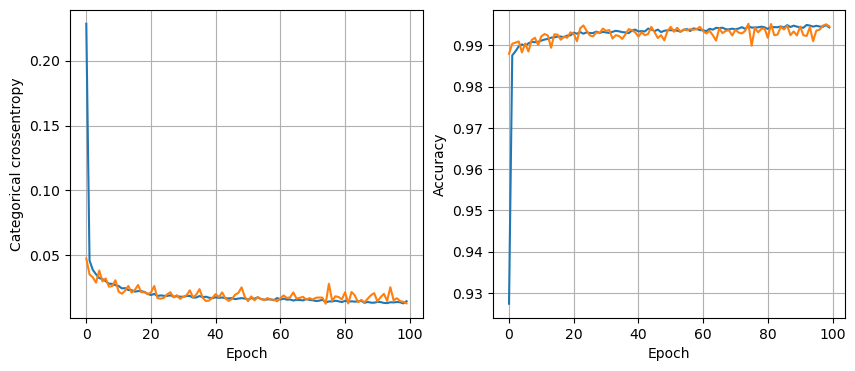

751/751 [==============================] - 0s 380us/step - loss: 0.0155 - accuracy: 0.9945
8 nodes, dropout 0, lr 0.01, batch size 128


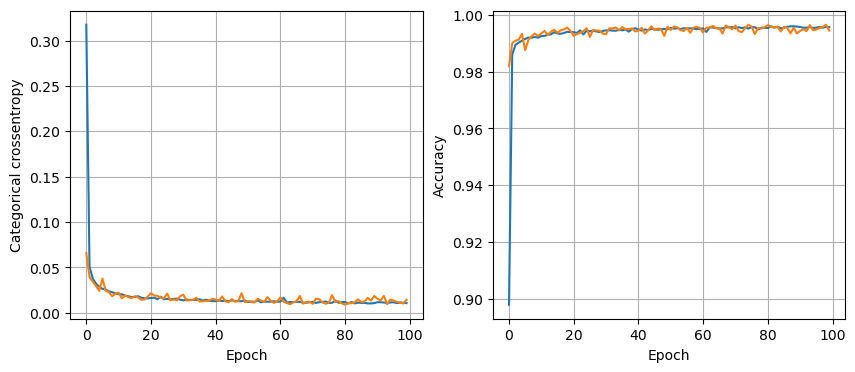

751/751 [==============================] - 0s 384us/step - loss: 0.0160 - accuracy: 0.9946
8 nodes, dropout 0, lr 0.005, batch size 32


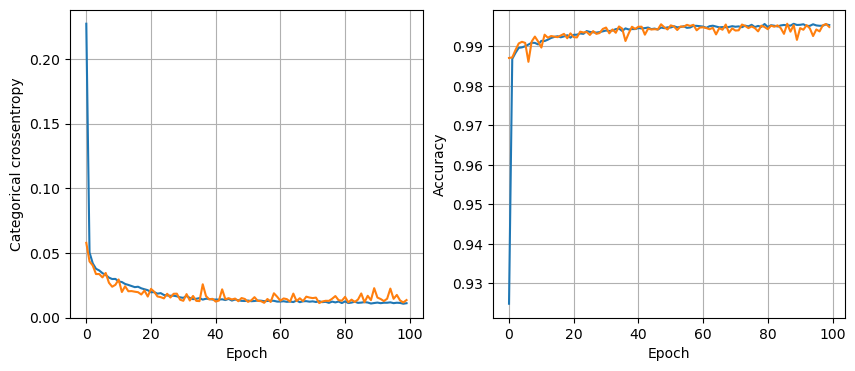

751/751 [==============================] - 0s 377us/step - loss: 0.0151 - accuracy: 0.9946
8 nodes, dropout 0, lr 0.005, batch size 64


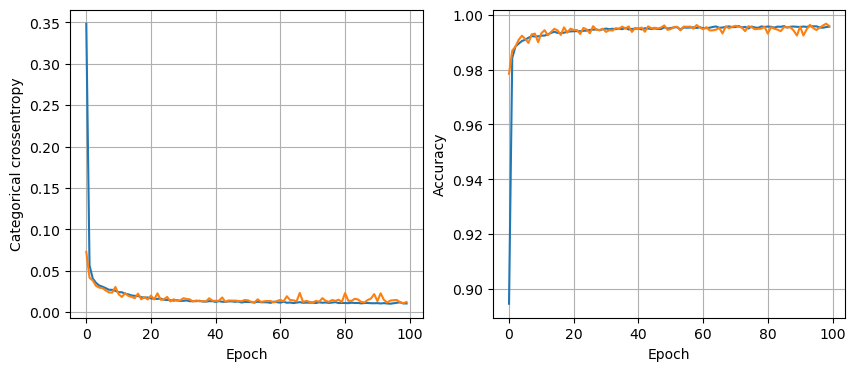

751/751 [==============================] - 0s 386us/step - loss: 0.0123 - accuracy: 0.9955
8 nodes, dropout 0, lr 0.005, batch size 128


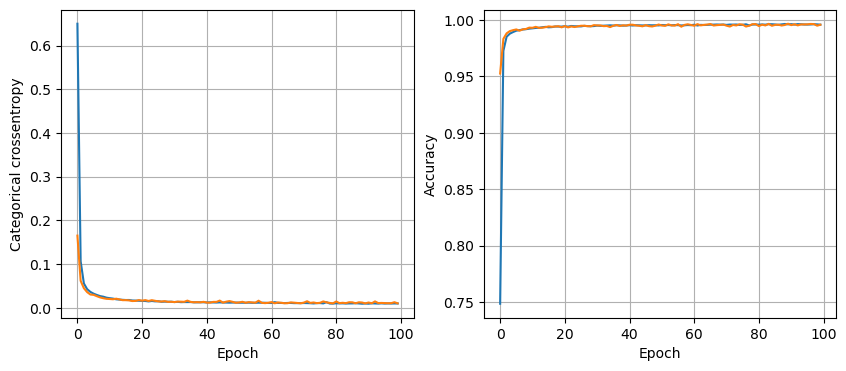

751/751 [==============================] - 0s 379us/step - loss: 0.0130 - accuracy: 0.9961
8 nodes, dropout 0, lr 0.001, batch size 32


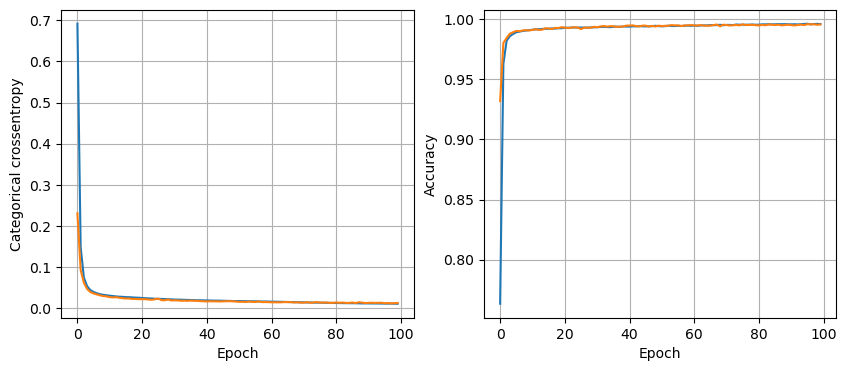

751/751 [==============================] - 0s 378us/step - loss: 0.0139 - accuracy: 0.9951
8 nodes, dropout 0, lr 0.001, batch size 64


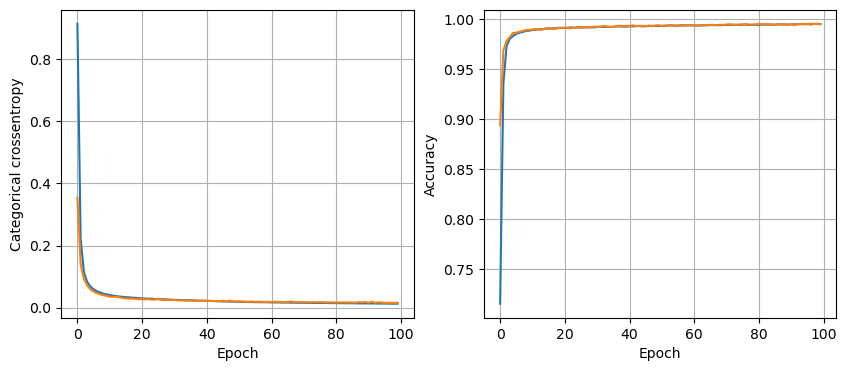

751/751 [==============================] - 0s 435us/step - loss: 0.0134 - accuracy: 0.9948
8 nodes, dropout 0, lr 0.001, batch size 128


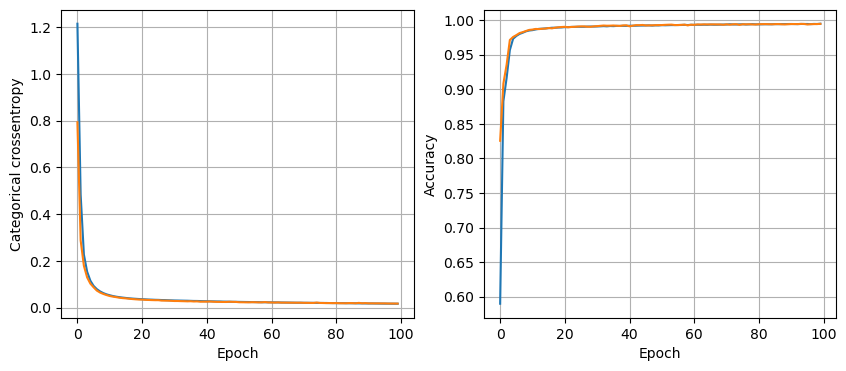

751/751 [==============================] - 0s 371us/step - loss: 0.0183 - accuracy: 0.9944
8 nodes, dropout 0.2, lr 0.01, batch size 32


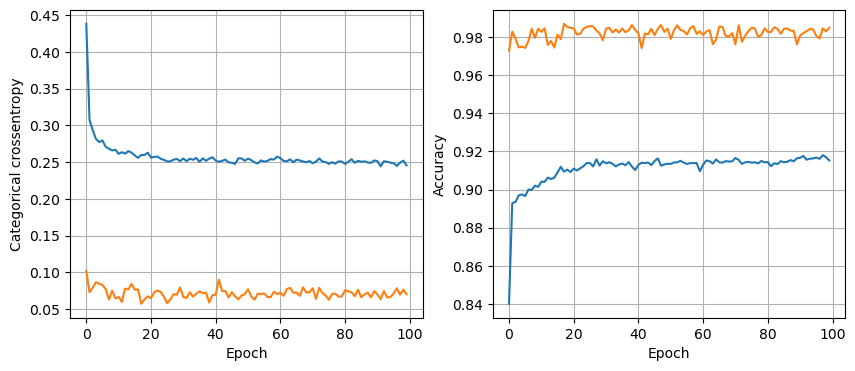

751/751 [==============================] - 0s 392us/step - loss: 0.0757 - accuracy: 0.9833
8 nodes, dropout 0.2, lr 0.01, batch size 64


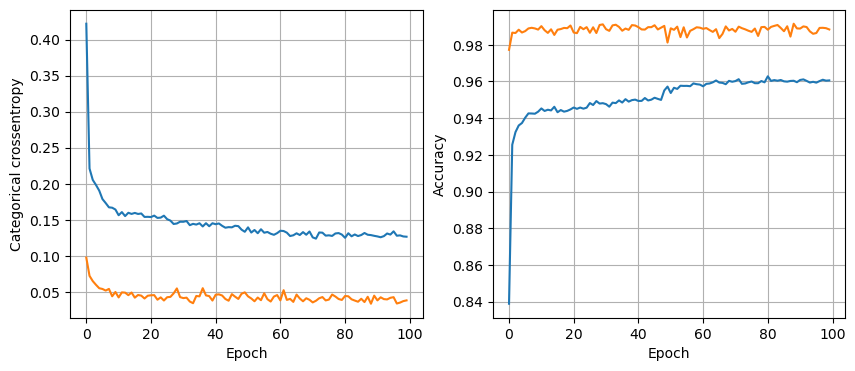

751/751 [==============================] - 0s 439us/step - loss: 0.0392 - accuracy: 0.9897
8 nodes, dropout 0.2, lr 0.01, batch size 128


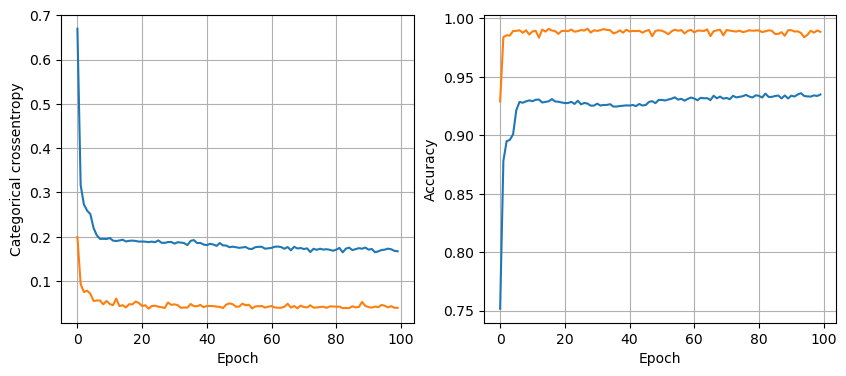

751/751 [==============================] - 0s 386us/step - loss: 0.0416 - accuracy: 0.9898
8 nodes, dropout 0.2, lr 0.005, batch size 32


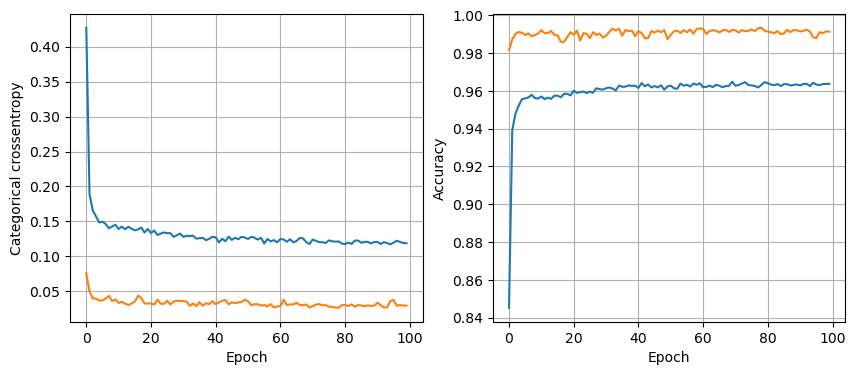

751/751 [==============================] - 0s 393us/step - loss: 0.0332 - accuracy: 0.9906
8 nodes, dropout 0.2, lr 0.005, batch size 64


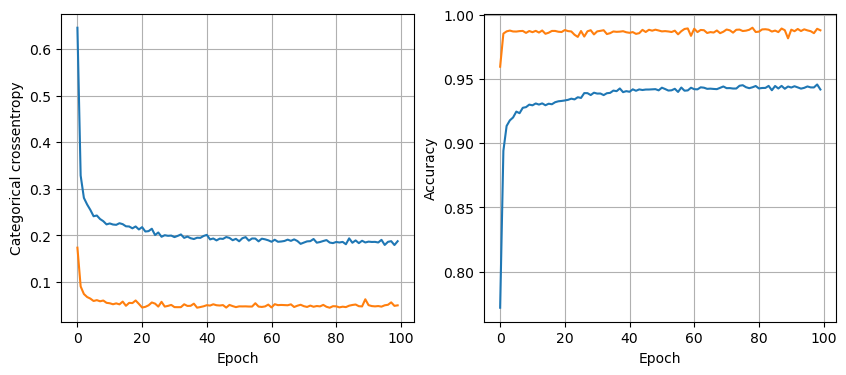

751/751 [==============================] - 0s 436us/step - loss: 0.0575 - accuracy: 0.9871
8 nodes, dropout 0.2, lr 0.005, batch size 128


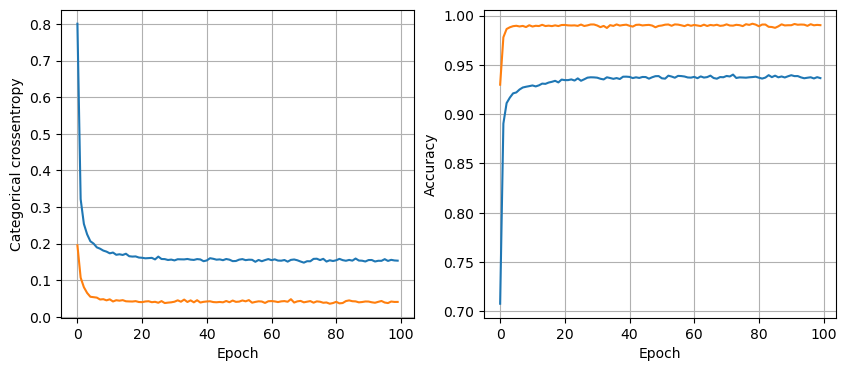

751/751 [==============================] - 0s 388us/step - loss: 0.0442 - accuracy: 0.9898
8 nodes, dropout 0.2, lr 0.001, batch size 32


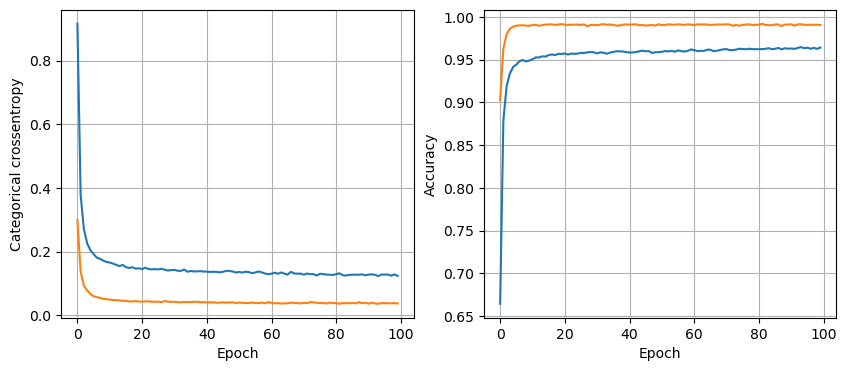

751/751 [==============================] - 0s 395us/step - loss: 0.0452 - accuracy: 0.9898
8 nodes, dropout 0.2, lr 0.001, batch size 64


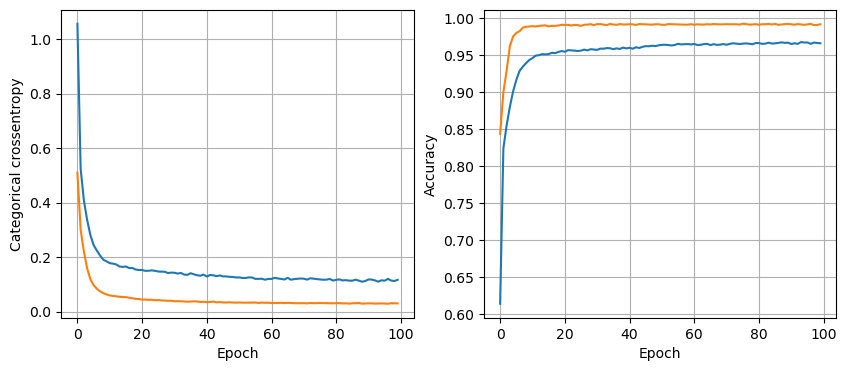

751/751 [==============================] - 0s 432us/step - loss: 0.0337 - accuracy: 0.9933
8 nodes, dropout 0.2, lr 0.001, batch size 128


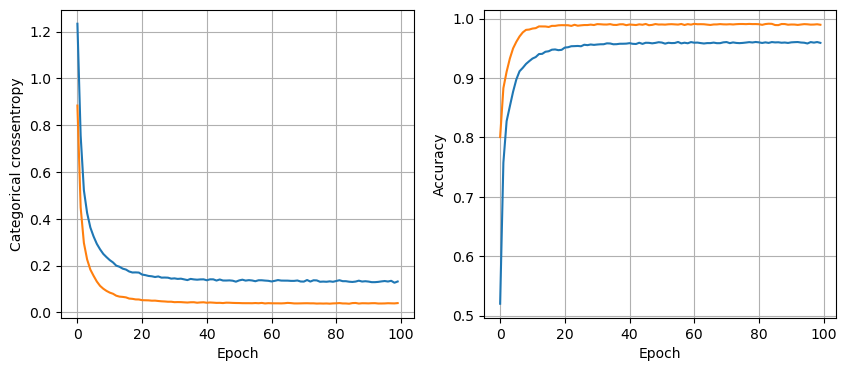

751/751 [==============================] - 0s 389us/step - loss: 0.0430 - accuracy: 0.9900
16 nodes, dropout 0, lr 0.01, batch size 32


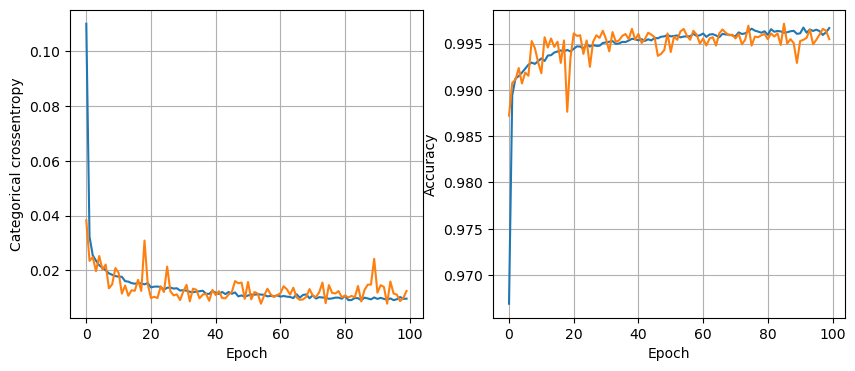

751/751 [==============================] - 0s 398us/step - loss: 0.0157 - accuracy: 0.9945
16 nodes, dropout 0, lr 0.01, batch size 64


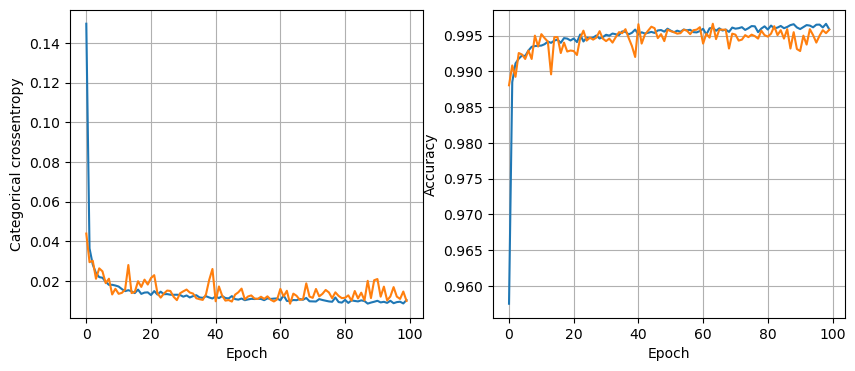

751/751 [==============================] - 0s 427us/step - loss: 0.0102 - accuracy: 0.9958
16 nodes, dropout 0, lr 0.01, batch size 128


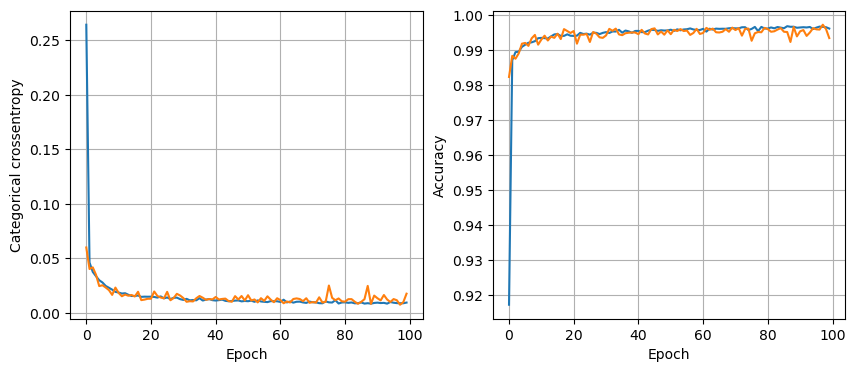

751/751 [==============================] - 0s 385us/step - loss: 0.0165 - accuracy: 0.9945
16 nodes, dropout 0, lr 0.005, batch size 32


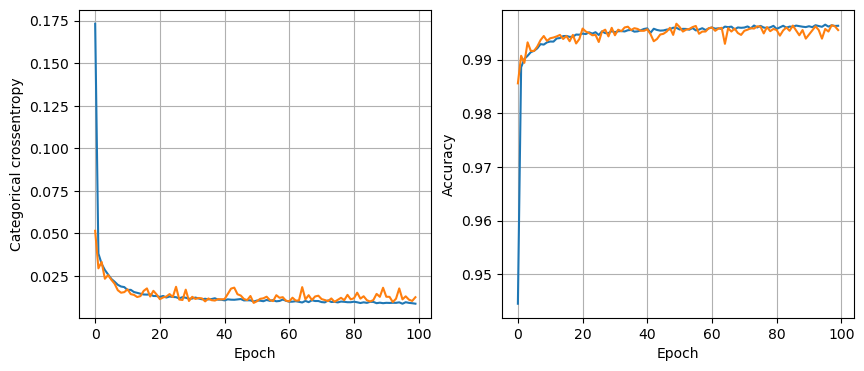

751/751 [==============================] - 0s 391us/step - loss: 0.0125 - accuracy: 0.9959
16 nodes, dropout 0, lr 0.005, batch size 64


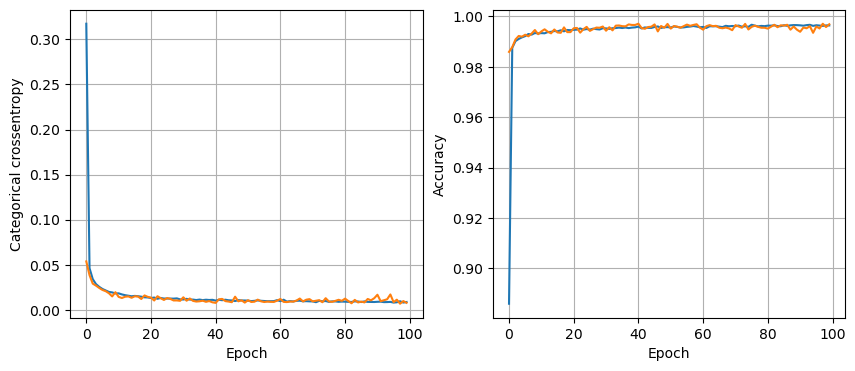

751/751 [==============================] - 0s 382us/step - loss: 0.0088 - accuracy: 0.9964
16 nodes, dropout 0, lr 0.005, batch size 128


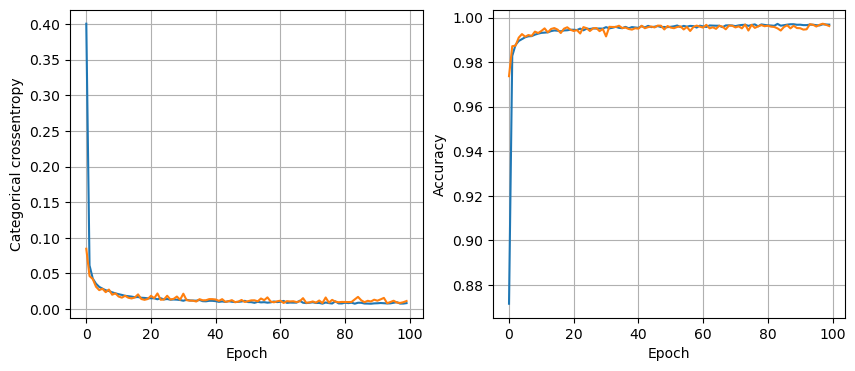

751/751 [==============================] - 0s 379us/step - loss: 0.0133 - accuracy: 0.9956
16 nodes, dropout 0, lr 0.001, batch size 32


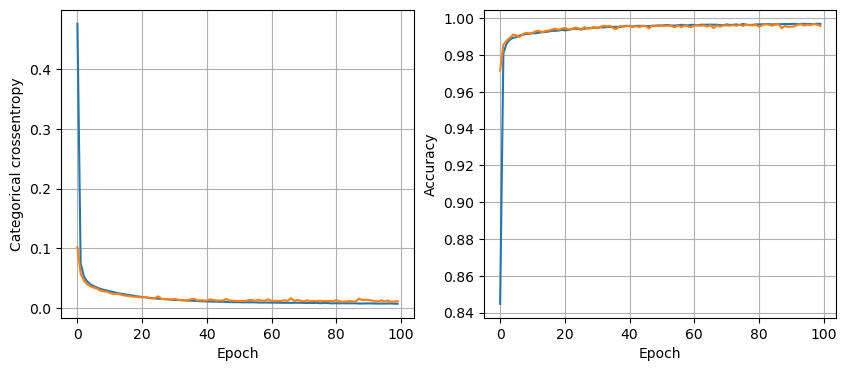

751/751 [==============================] - 0s 397us/step - loss: 0.0115 - accuracy: 0.9956
16 nodes, dropout 0, lr 0.001, batch size 64


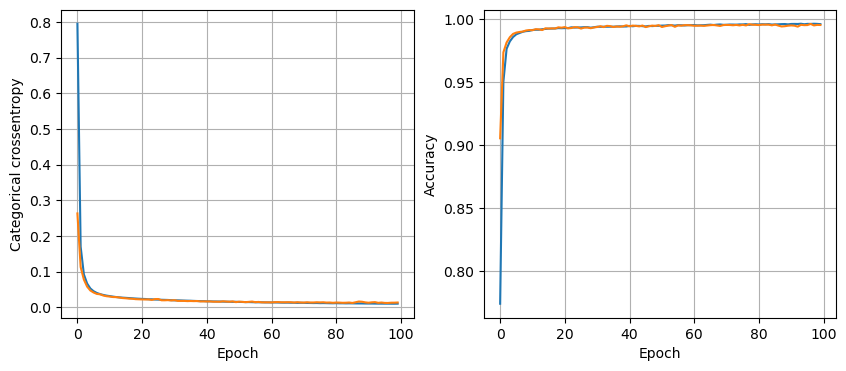

751/751 [==============================] - 0s 491us/step - loss: 0.0114 - accuracy: 0.9954
16 nodes, dropout 0, lr 0.001, batch size 128


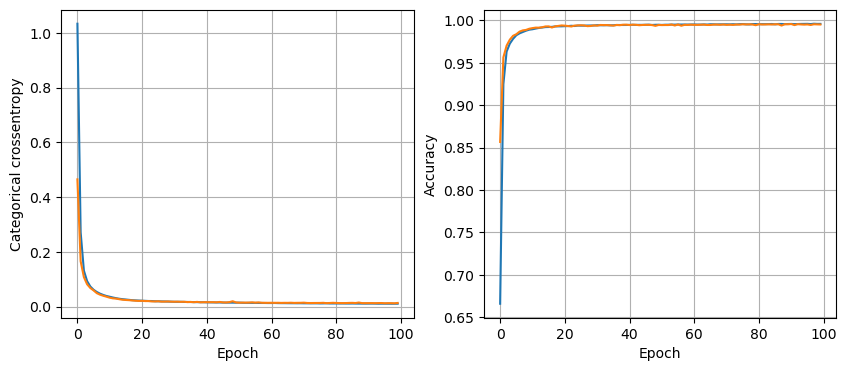

751/751 [==============================] - 0s 384us/step - loss: 0.0144 - accuracy: 0.9946
16 nodes, dropout 0.2, lr 0.01, batch size 32


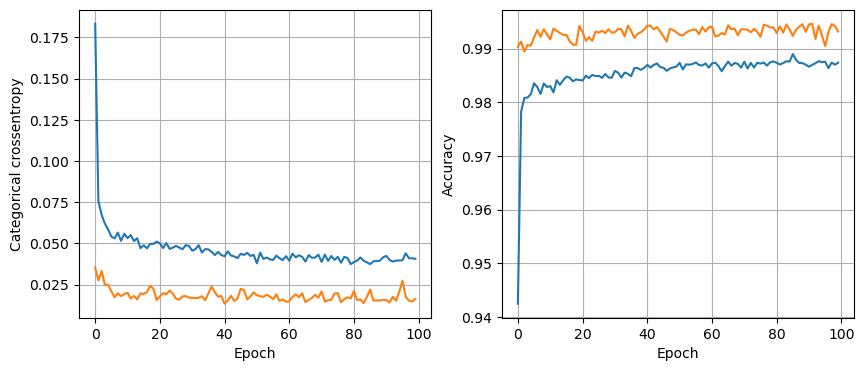

751/751 [==============================] - 0s 424us/step - loss: 0.0189 - accuracy: 0.9928
16 nodes, dropout 0.2, lr 0.01, batch size 64


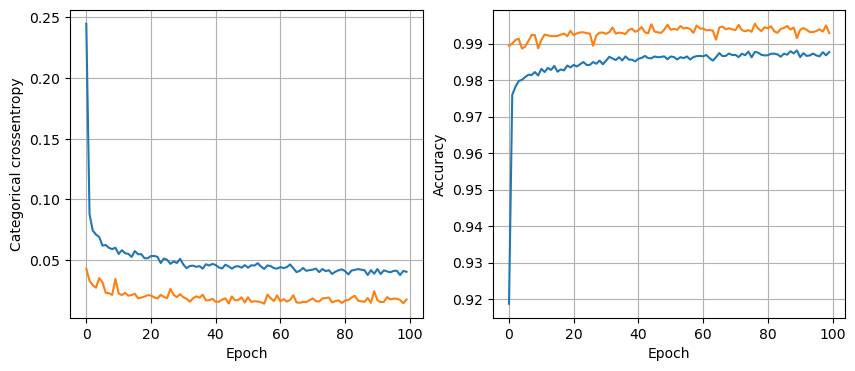

751/751 [==============================] - 0s 398us/step - loss: 0.0190 - accuracy: 0.9928
16 nodes, dropout 0.2, lr 0.01, batch size 128


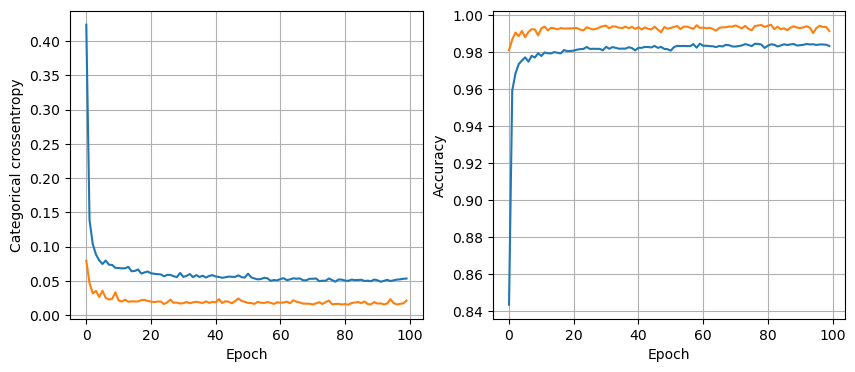

751/751 [==============================] - 0s 391us/step - loss: 0.0223 - accuracy: 0.9918
16 nodes, dropout 0.2, lr 0.005, batch size 32


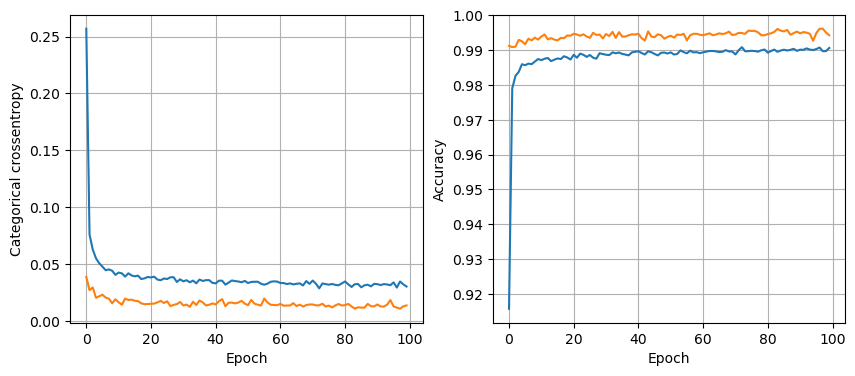

751/751 [==============================] - 0s 429us/step - loss: 0.0143 - accuracy: 0.9943
16 nodes, dropout 0.2, lr 0.005, batch size 64


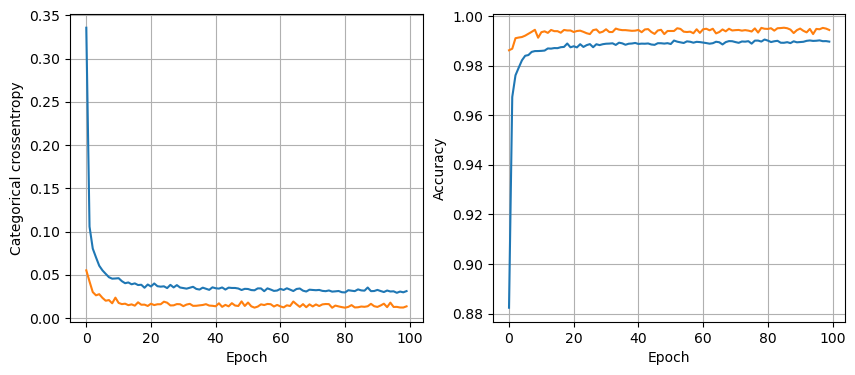

751/751 [==============================] - 0s 387us/step - loss: 0.0145 - accuracy: 0.9943
16 nodes, dropout 0.2, lr 0.005, batch size 128


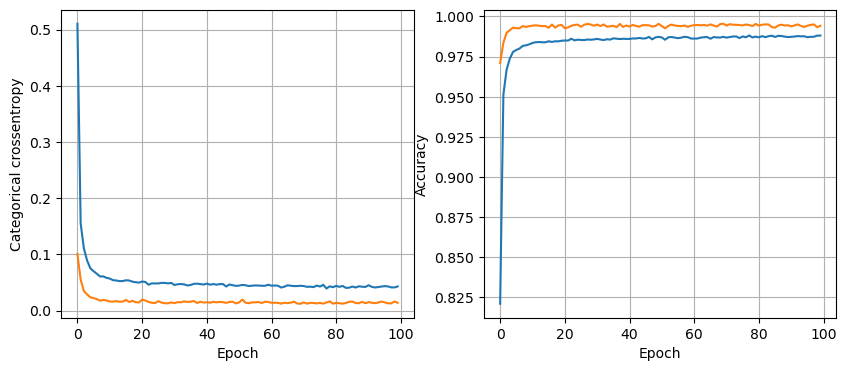

751/751 [==============================] - 0s 391us/step - loss: 0.0144 - accuracy: 0.9942
16 nodes, dropout 0.2, lr 0.001, batch size 32


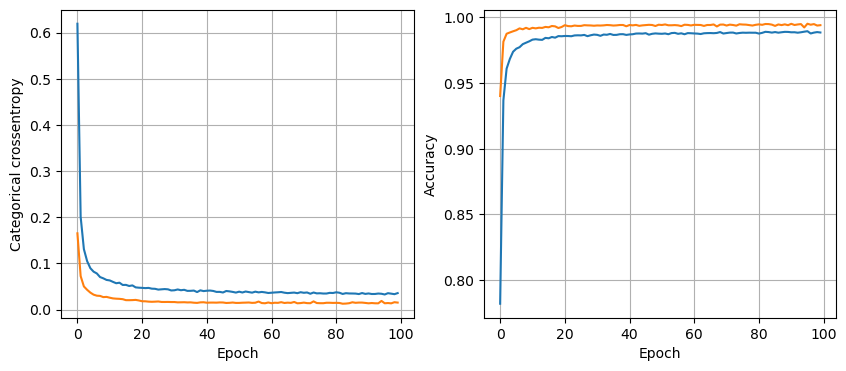

751/751 [==============================] - 0s 390us/step - loss: 0.0180 - accuracy: 0.9943
16 nodes, dropout 0.2, lr 0.001, batch size 64


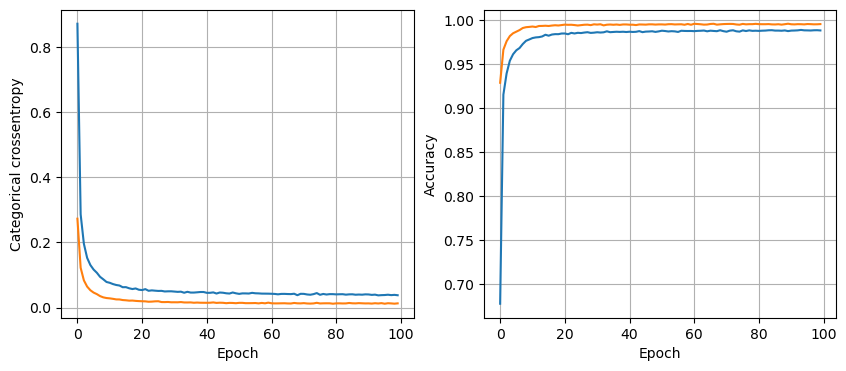

751/751 [==============================] - 0s 409us/step - loss: 0.0143 - accuracy: 0.9948
16 nodes, dropout 0.2, lr 0.001, batch size 128


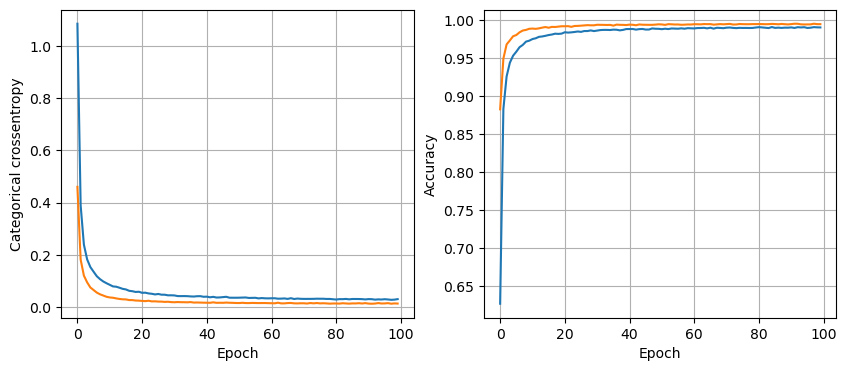

751/751 [==============================] - 0s 397us/step - loss: 0.0148 - accuracy: 0.9948
32 nodes, dropout 0, lr 0.01, batch size 32


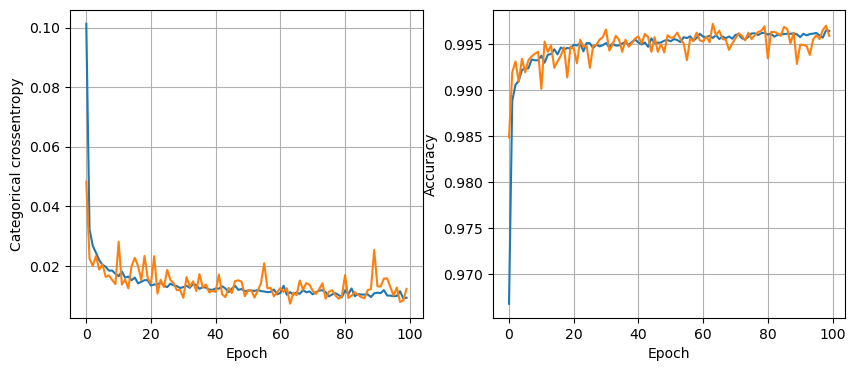

751/751 [==============================] - 0s 404us/step - loss: 0.0151 - accuracy: 0.9961
32 nodes, dropout 0, lr 0.01, batch size 64


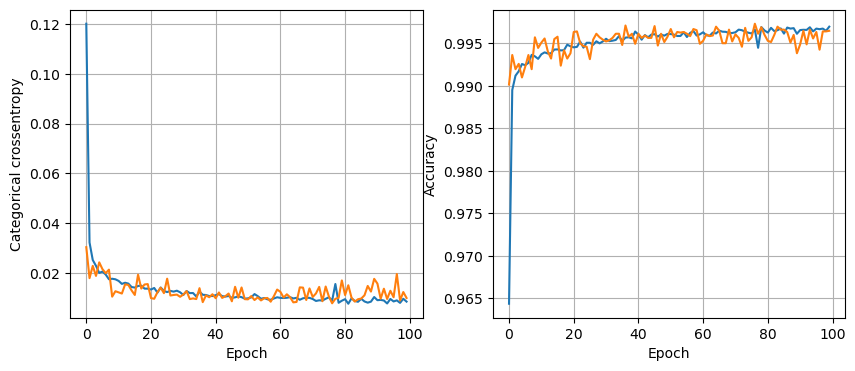

751/751 [==============================] - 0s 400us/step - loss: 0.0108 - accuracy: 0.9964
32 nodes, dropout 0, lr 0.01, batch size 128


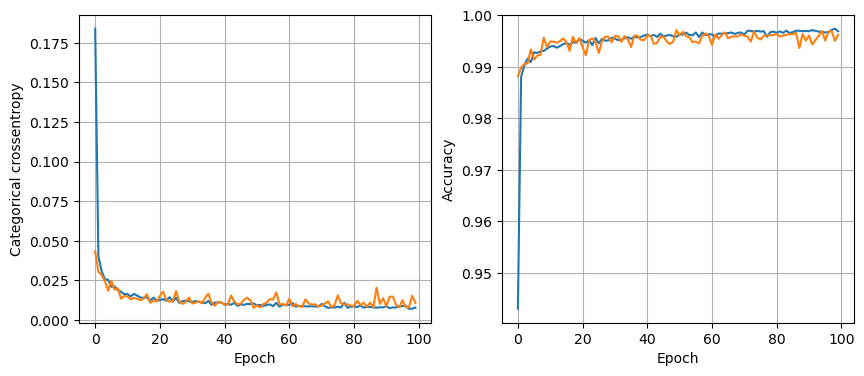

751/751 [==============================] - 0s 405us/step - loss: 0.0138 - accuracy: 0.9960
32 nodes, dropout 0, lr 0.005, batch size 32


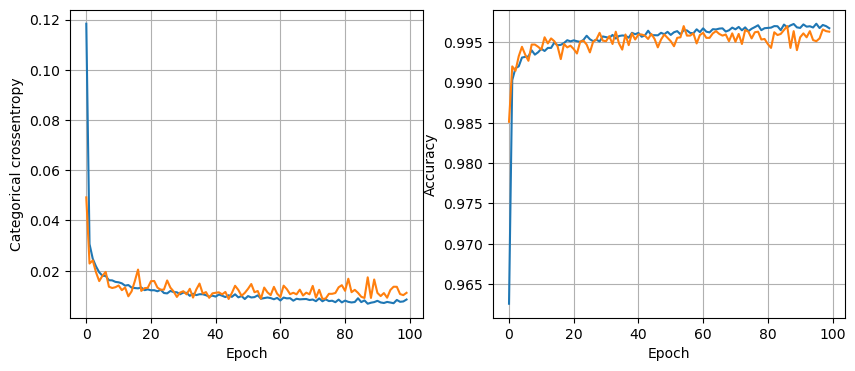

751/751 [==============================] - 0s 398us/step - loss: 0.0114 - accuracy: 0.9963
32 nodes, dropout 0, lr 0.005, batch size 64


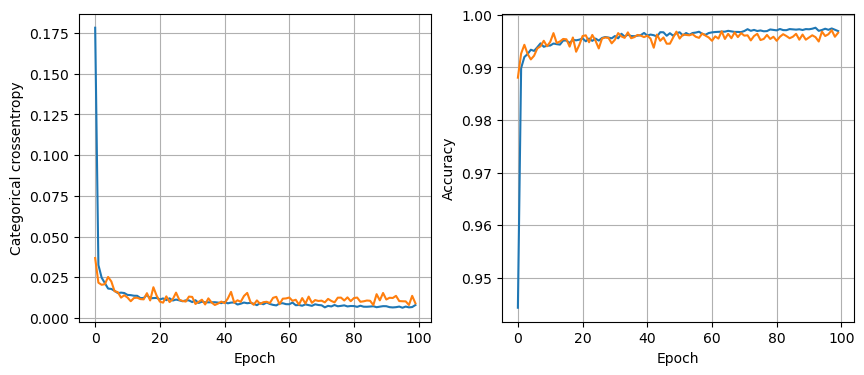

751/751 [==============================] - 0s 401us/step - loss: 0.0094 - accuracy: 0.9960
32 nodes, dropout 0, lr 0.005, batch size 128


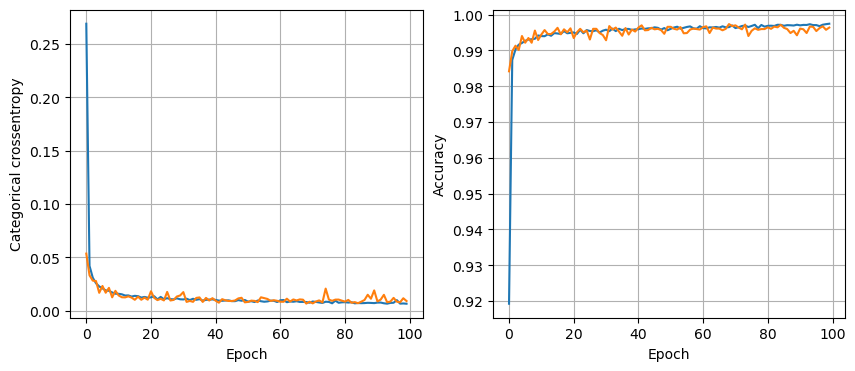

751/751 [==============================] - 0s 400us/step - loss: 0.0104 - accuracy: 0.9962
32 nodes, dropout 0, lr 0.001, batch size 32


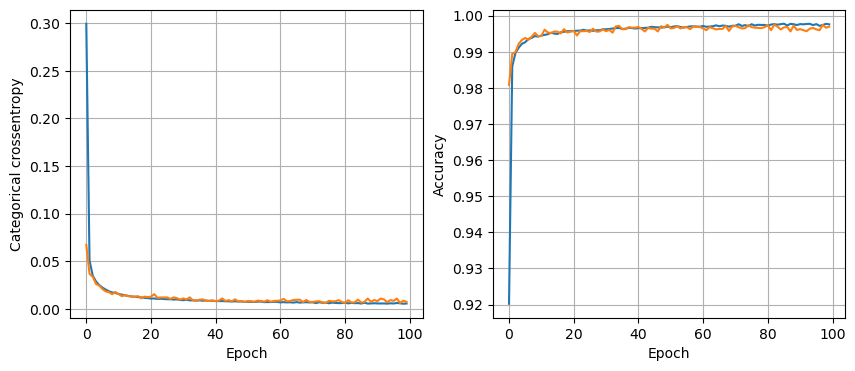

751/751 [==============================] - 0s 398us/step - loss: 0.0093 - accuracy: 0.9965
32 nodes, dropout 0, lr 0.001, batch size 64


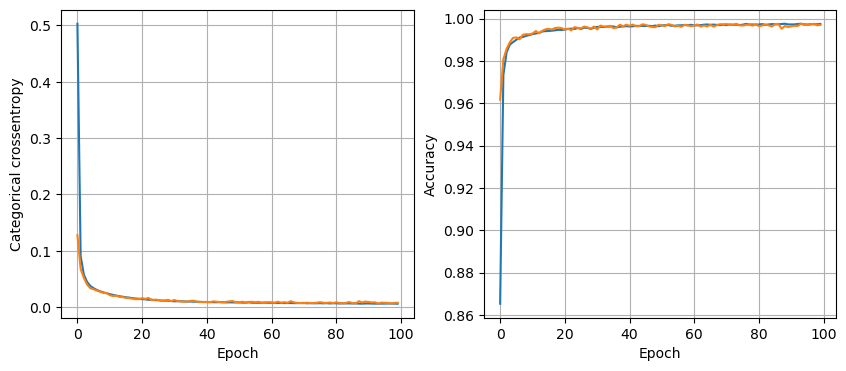

751/751 [==============================] - 0s 396us/step - loss: 0.0102 - accuracy: 0.9963
32 nodes, dropout 0, lr 0.001, batch size 128


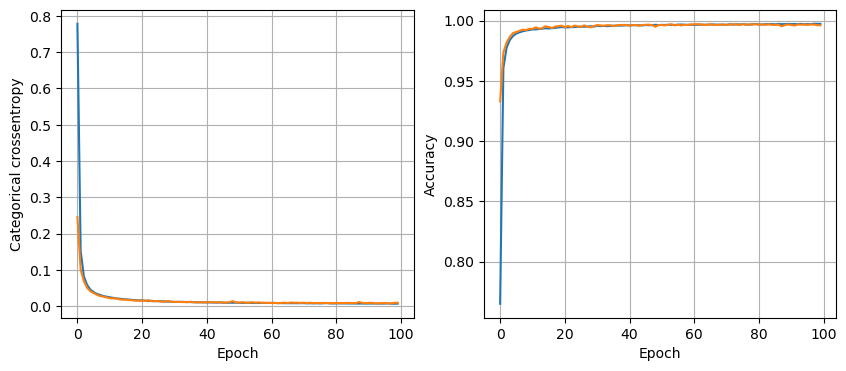

751/751 [==============================] - 0s 397us/step - loss: 0.0113 - accuracy: 0.9956
32 nodes, dropout 0.2, lr 0.01, batch size 32


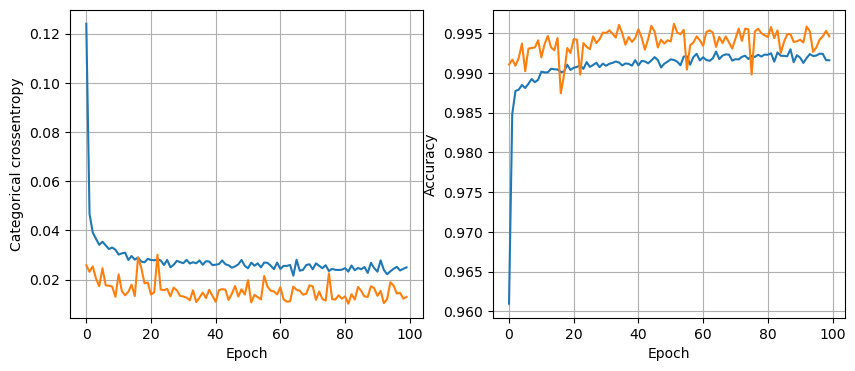

751/751 [==============================] - 0s 404us/step - loss: 0.0151 - accuracy: 0.9940
32 nodes, dropout 0.2, lr 0.01, batch size 64


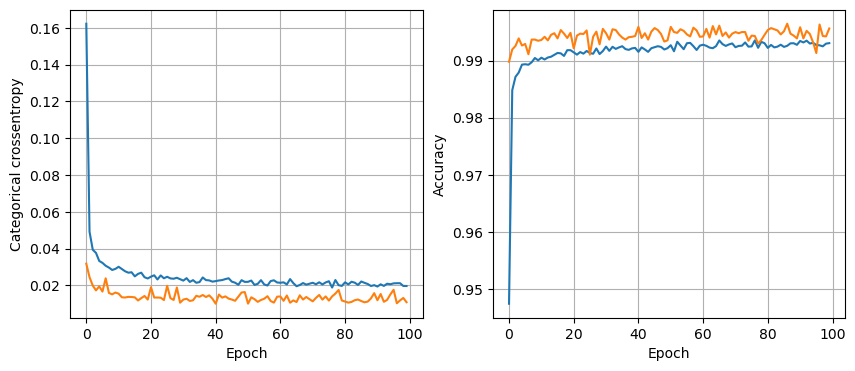

751/751 [==============================] - 0s 420us/step - loss: 0.0117 - accuracy: 0.9955
32 nodes, dropout 0.2, lr 0.01, batch size 128


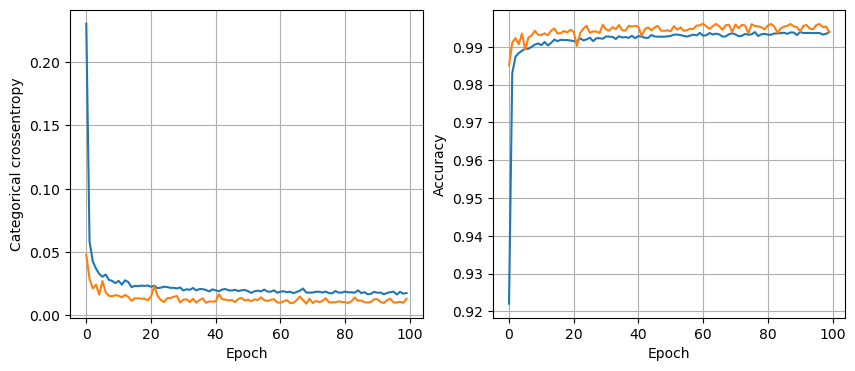

751/751 [==============================] - 0s 446us/step - loss: 0.0137 - accuracy: 0.9948
32 nodes, dropout 0.2, lr 0.005, batch size 32


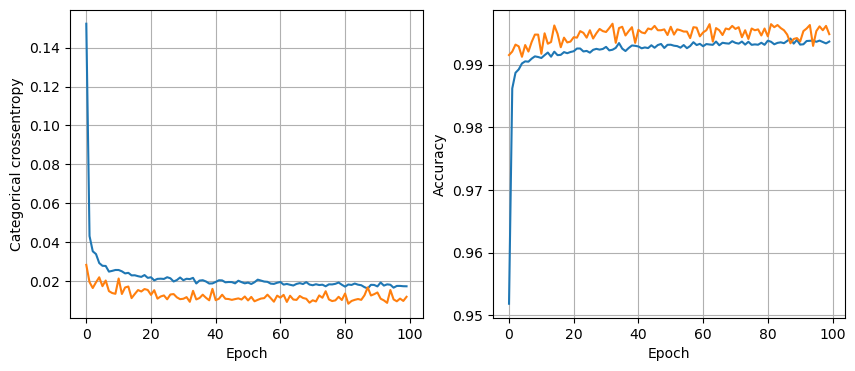

751/751 [==============================] - 0s 483us/step - loss: 0.0137 - accuracy: 0.9940
32 nodes, dropout 0.2, lr 0.005, batch size 64


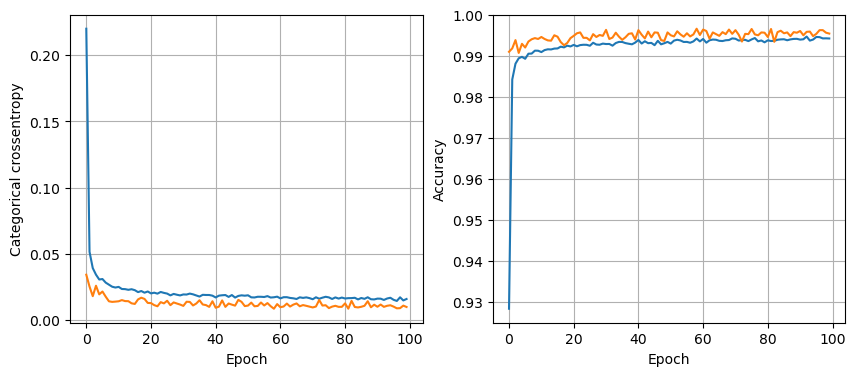

751/751 [==============================] - 0s 402us/step - loss: 0.0111 - accuracy: 0.9950
32 nodes, dropout 0.2, lr 0.005, batch size 128


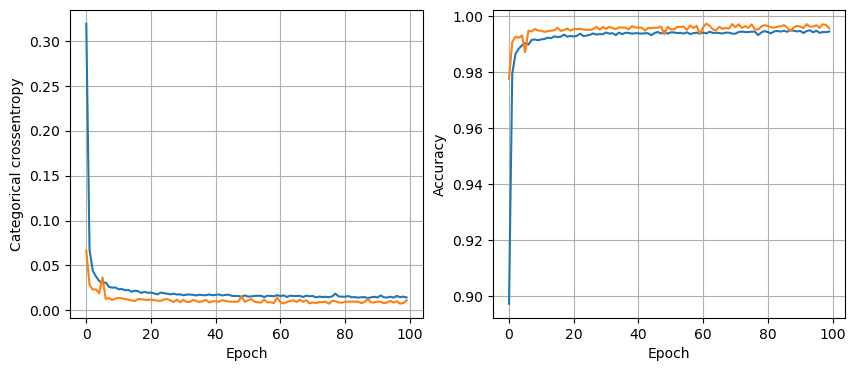

751/751 [==============================] - 0s 415us/step - loss: 0.0119 - accuracy: 0.9950
32 nodes, dropout 0.2, lr 0.001, batch size 32


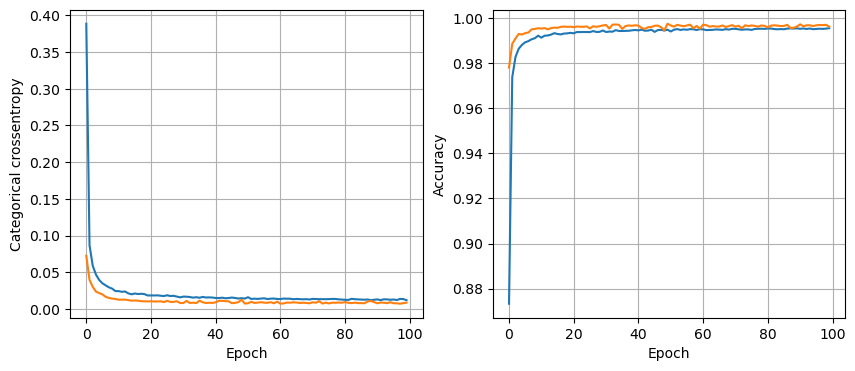

751/751 [==============================] - 0s 509us/step - loss: 0.0096 - accuracy: 0.9959
32 nodes, dropout 0.2, lr 0.001, batch size 64


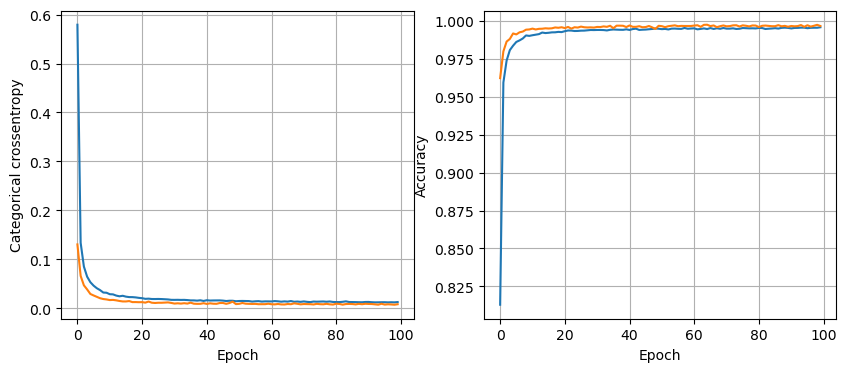

751/751 [==============================] - 0s 410us/step - loss: 0.0108 - accuracy: 0.9955
32 nodes, dropout 0.2, lr 0.001, batch size 128


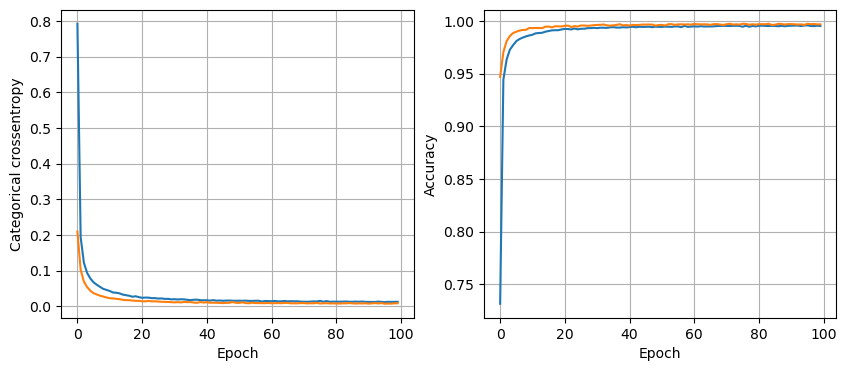

751/751 [==============================] - 0s 294us/step
Best parameters: (16, 0, 0.005, 64)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1852
           1       1.00      1.00      1.00      9345
           2       1.00      1.00      1.00      9101
           3       1.00      1.00      1.00      2064
           4       0.98      0.98      0.98      1642

    accuracy                           1.00     24004
   macro avg       0.99      0.99      0.99     24004
weighted avg       1.00      1.00      1.00     24004

Execution time: 46 minutes and 47 seconds


In [59]:
# Neural Network

# start the timer
start_time_NN = time.time()

# splitting the data
X_train_NN, X_val_NN, y_train_NN, y_val_NN = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# label Encoding
label_encoder = LabelEncoder()
y_train_NN_encoded = label_encoder.fit_transform(y_train_NN)
y_val_NN_encoded = label_encoder.transform(y_val_NN)
y_test_NN_encoded = label_encoder.transform(y_test)

# one-Hot Encoding
y_train_NN_one_hot = to_categorical(y_train_NN_encoded, num_classes=5)
y_val_NN_one_hot = to_categorical(y_val_NN_encoded, num_classes=5)
y_test_NN_one_hot = to_categorical(y_test_NN_encoded, num_classes=5)

# plot the training history
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Categorical crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

# training Function
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size):
    # build the model
    NN_model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(11,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(5, activation='softmax')
    ])

    # compile the model
    NN_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(lr), metrics=['accuracy'])
    
    # train the model
    history = NN_model.fit(
        X_train, y_train, epochs=100, batch_size=batch_size, validation_split=0.2, verbose=0
    )
    
    return NN_model, history

# scale the data
scaler_NN = MinMaxScaler()
X_train_scaled = scaler_NN.fit_transform(X_train_NN)
X_val_scaled = scaler_NN.transform(X_val_NN)
X_test_scaled = scaler_NN.transform(X_test)

# training Loop
least_val_loss = float('inf')
least_loss_model = None
best_params = None
for num_nodes in [8, 16, 32]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train_scaled, y_train_NN_one_hot, num_nodes, dropout_prob, lr, batch_size)
                plot_history(history)
                val_loss, _ = model.evaluate(X_val_scaled, y_val_NN_one_hot)
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model
                    best_params = (num_nodes, dropout_prob, lr, batch_size)


# predicting on the test set
y_pred_probs = least_loss_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded y_test to label encoded for comparison
y_test_NN_label_encoded = np.argmax(y_test_NN_one_hot, axis=1)

# print the best parameters
print(f"Best parameters: {best_params}")

# Print classification report
print(classification_report(y_test_NN_label_encoded, y_pred))

# stop the timer
end_time_NN = time.time()

# calculate the execution time
duration_NN = end_time_NN - start_time_NN

# print the execution time
print(f"Execution time: {int(duration_NN // 60)} minutes and {int(duration_NN % 60)} seconds" if duration_NN >= 60 else f"Execution time: {int(duration_NN)} seconds\n")

In [ ]:
# save the best models (check whether the file alleady exists)
if not os.path.exists('best_model_LR.joblib'):
    dump(grid_search_LR, 'best_model_LR.joblib')

if not os.path.exists('best_model_NN.joblib'):
    least_loss_model.save('best_model_NN')

INFO:tensorflow:Assets written to: best_model_NN/assets


INFO:tensorflow:Assets written to: best_model_NN/assets
